# **SHapley Additive exPlanations Model Interpretability Analysis for Top2Vec Natural Language Processing**: Part 3

## **III. Proposed Methods**: continued

### **III.B. Topic Modeling:**

Topic modeling is the process of extracting underlying structures within a collection of texts in the form of statistical language models. This involves representing a text in a topic space rather than in its feature space in a process called dimensionality reduction. By building clusters of words in the form of topics that make up a text with each topic cluster having a particular weight using an Unsupervised Learning process, the information within abstract topic clusters can be best represented from the document collection using a tagging process. [[4]](https://github.com/kapadias/mediumposts/blob/master/natural_language_processing/topic_modeling/notebooks/Introduction%20to%20Topic%20Modeling.ipynb)

### **B.1. Top2Vec Algorithm:**

Top2Vec expresses the semantic similarity from the distance between document and word vectors that the topic vectors are jointly embedded with by using joint document and word semantic embedding to find topic vector clusters. Top2Vec can automatically find the number of topics without the use of stop-word lists, stemming, or lemmatization. The Top2Vec algorithm comprises the following steps: [[5]](https://arxiv.org/abs/2008.09470)


**1.a. Create the jointly embedded document and word vectors using Doc2Vec.**

* In this step, the algorithm generates the embedding where the distance between document vectors and word vectors represents semantic association. A Doc2Vec model is used to learn document embeddings to estimate a distributed representation of documents using a model architecture called a  Paragraph Vector Distributed Bag of Words (PV-DBOW). As a common fixed-length vector representation for texts within machine learning algorithms such as k-means or logistic regression, Bag-of-Words (BOW) can be used for clustering and text classification functions that utilizes applications such as web searching, spam filtering, and document retrieval.
* Paragraph Vectors come from the unsupervised learning of fixed-length feature representations of variable-length pieces of texts including sentences, paragraphs, and documents. The unsupervised learning algorithm is trained to predict words in the document in order to represent each document as a dense vector. Paragraph vector learning comes from word vector learning methods such as Word2Vec. In the example figure here, the context from the three words “the,” “cat,” and “sat” is used to predict the fourth word “on”, which is mapped to the matrix W columns for the output word prediction. [[5]](https://arxiv.org/abs/2008.09470) [[6]](https://arxiv.org/abs/1405.4053)

* 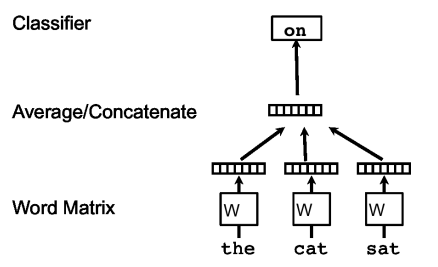

* In the Word2Vec learning framework, every word is mapped to a unique vector in the form of a column within matrix W. By indexing the column by the word position within the vocabulary, the concatenation takes the sum of the vectors to use as features to predict the next word in a sentence. The word vector mode is supposed to maximize the average log probability given a sequence of training words.

* 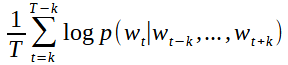

* A multi-class classifier, such as Softmax is used for the prediction task.

* image.png = 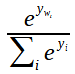

* The value of each yi represents an un-normalized log-probability for each output word i, where U and b are the softmax parameters and h is generated from the average of word vectors extracted from W.

* y = image.png

* PV-DBOW trains paragraph vectors to predict words in a small window, ignoring the word context from the input to predict randomly sampled words from the paragraph output. The classifier samples a random word from a randomly sampled text window at each stochastic gradient descent iteration given to the paragraph vector.

* 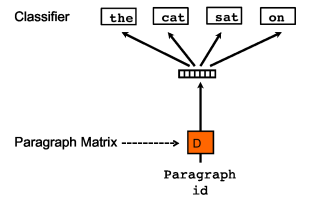

* The surrounding word in a context window is predicted by DBOW swapping the context word with the document vector. This similarity allows for joint embedding, which occurs when the simultaneous training of document and word vectors become interleaved. A dense area of documents within a semantic space can be interpreted as an area of highly similar documents indicative of an underlying common topic. The topics of the documents represented by the document vectors can have the average of those vectors calculated as the centroid, which is most representative of the dense area of documents it’s calculated from. The topic vector gives the best semantic description of the words closest to it, with each number of dense clusters representing a number of prominent topics. [[6]](https://arxiv.org/abs/1405.4053)

**1.b. Create lower dimensional embedding of document vectors using UMAP.**


* The Uniform Manifold Approximation and Projection (UMAP) algorithm is a manifold learning technique for dimension reduction that approximates the manifold that the data is assumed to lie on. The geodesic distance on the manifold can be approximated by letting the input data be X = {X1,..., XN}, meaning that a ball centered at Xi with exactly the k-nearest-neighbors of Xi should have approximately fixed volume regardless of the choice of Xi ∈ X. The validity of assumption of uniform distribution on the manifold can be ensured with a custom distance for each Xi. The functors between the relevant categories to convert from metric spaces to fuzzy topological representations provide a means to merge the incompatible local views of the data.
* Letting Y = {Y1,..., YN}, ⊆ Rd be a low dimensional (d << n) representation of X such that Yi represents the source data point Xi, a target manifold for Y can be chosen from the former, so that the manifold and manifold metric from the former can be known to directly compute the fuzzy topological representation. To incorporate the distance to the nearest neighbor for the local connectivity requirement, a parameter can be supplied that defines the expected distance between nearest neighbors in the embedded space. [[8]](https://arxiv.org/abs/1802.03426)
* For the Top2Vec algorithm, the number of nearest neighbors is set to 15 to give more emphasis on local structure. The distance metric to measure the distance between points in the high dimensional space is the cosine similarity to measure the similarity of documents irrespective of their size. [[5]](https://arxiv.org/abs/2008.09470)

**1.c. Find dense areas of documents using HDBSCAN.**

* Hierarchical Density-based spatial clustering of applications with noise (HDBSCAN) assigns a label for each dense cluster of document vectors and assigns a noise label to all document vectors that are not in a dense cluster so that the dense areas of identified document vectors can be used to calculate the topic vectors. Documents that are classified as noise are considered not to be descriptive of a prominent topic. [[5]](https://arxiv.org/abs/2008.09470)

* HDBSCAN main steps:
    1. Compute the core distance for all data objects.
    2. Compute the mutual reach-ability distance graph.
    3. Add for each vertex a “self edge” with the core distance of the corresponding object as a weight.
    4. Extract the HDBSCAN hierarchy as a dendrogram diagram representing a tree:
        ◦ 4.1 The tree assigns all objects the same label for the root of the single cluster. 
        ◦ 4.2 Iteratively remove all edges in decreasing order of weights: [[8]](https://link.springer.com/chapter/10.1007/978-3-642-37456-2_14)
            ▪ 4.2.1 Set the dendrogram scale value of the current hierarchical level as the weight of the edges to be removed before each removal.
            ▪ 4.2.2 Assign labels to the connected components that contain the end vertices of the removed edges, to obtain the next hierarchical level and assign a new cluster label to a component if it still has at least one edge, or assign it a null noise label after each removal. 

**1.d. Calculate the centroid of document vectors in the original dimension for each dense area to find the topic vector.**

* The dense document clusters and noise documents identified by HDBSCAN in the UMAP reduced dimension, correspond to locations in the original semantic embedding space so that each document in the embedding space can be labeled with either a noise label or a dense cluster label. The topic vector can be calculated from the document vectors similarly to how the labels for each dense cluster of documents can be calculated. The centroid can be calculated by finding the arithmetic mean of all the document vectors in the same dense cluster. [[5]](https://arxiv.org/abs/2008.09470)

**1.e. Find n-closest word vectors to the resulting topic vector.** 

* Every point in the semantic space represents a topic best described semantically by its nearest word vectors that are closest to a topic vector most representative of semantically where the distance between each word vector to the topic vector indicates how semantically similar the word is to the topic. The words closest to the topic vector can be considered as the words most similar to all documents in that dense area, with the topic vector being the centroid of that area to summarize the common topic of the documents in the dense area. Common words appearing in most documents are often in a region of the semantic space equally distant from all documents so the words closest to a topic vector should rarely be stop-words, so there shouldn’t be a need for stop-word removal. [[5]](https://arxiv.org/abs/2008.09470)

## **I.V. Results and Analysis**

## **INSTALLATIONS:**


* ValueError: numpy.ndarray size changed, may indicate binary incompatibility.
  * This issue also happens in other python packages such hdbscan, top2vec.
    * https://github.com/ing-bank/sparse_dot_topn/issues/48


In [2]:
# !pip uninstall numpy
# !pip install numpy==1.23.5

Found existing installation: numpy 1.22.4
Uninstalling numpy-1.22.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.8
    /usr/local/lib/python3.8/dist-packages/numpy-1.22.4.dist-info/*
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libopenblas64_p-r0-2f7c42d4.3.18.so
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.8/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.22.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.23.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=

In [1]:
# !pip install top2vec # For Topic Model
# !pip install pyyaml h5py # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.9 MB 4.6 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **IMPORTED LIBRARIES**

In [3]:
from top2vec import Top2Vec # To process a topic clustering of the data.

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import pandas as pd  # To read the csv file to a data frame.
import numpy as np # To set a randomization seed.

import tensorflow as tf # Save model.
from tensorflow import keras # Load model.
print(tf.version.VERSION)


2.9.2


### **UPLOAD DATA**

Air Force and Space Force data was scraped in the prior weeks with the similar Pushshift API method as used with prior data. However, Pushshift API has not been working as of the past few days, so the code is not included, but the data is included with the project for processing, clustering, and analyses.

* Department of Air Force related subreddit page comments:
  * https://www.reddit.com/r/AirForce/
  * https://www.reddit.com/r/SpaceForce/

* How to remove rows from a dataframe that are identical to another dataframe?
  * https://datascience.stackexchange.com/questions/37227/how-to-remove-rows-from-a-dataframe-that-are-identical-to-another-dataframe/37229#37229

In [60]:
# Approximately 1.1 million Department of Air Force related comments.
# Specifically, scraped comments are from the r/AirForce and r/SpaceForce subreddits.
df_DAF_1mil = pd.read_csv("/DAF_comments.csv")
# Initial r/AirForce subbreddit scraped comments of about 100k.
df_AF_100k = pd.read_csv("/AF_comments_100k.csv")
 

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6,12,14,17,26,28,31,33,53,58) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


* How to Drop Rows with Multiple Conditions in Pandas.
  * https://www.freecodecamp.org/news/drop-list-of-rows-from-pandas-dataframe/#:~:text=To%20drop%20rows%20based%20on,to%20the%20drop()%20method.&text=inplace%3DTrue)%20df-,In%20this%20code%2C,condition%20to%20drop%20the%20rows.

In [95]:
df_DAF_no_del = df_DAF_1mil
df_DAF_no_del.drop(df_DAF_no_del[(df_DAF_no_del['body'] == '[deleted]')].index, inplace=True)
df_DAF_no_del

,body,created_utc
0,"#1, every base is what you make of it. If you ...",1.390011e+09
1,You should buy my house.,1.390011e+09
2,WHAT!?!?! NO Way! I bet *noone* on this sub h...,1.390011e+09
3,*cough* \nProbablydefinitely.,1.390010e+09
4,If you want warm feet.,1.390010e+09
...,...,...
1093798,Have you been there?,1.645842e+09
1093800,Wish granted! Space Command and Staff College ...,1.645838e+09
1093801,"I hate to break it to you, but Gary is better ...",1.645838e+09
1093802,I was at Naval Postgraduate School for my MS. ...,1.645838e+09


In [96]:
df_AF_100k_no_del = df_AF_100k
df_AF_100k_no_del.drop(df_AF_100k_no_del[(df_AF_100k_no_del['body'] == '[deleted]')].index, inplace=True)
df_AF_100k_no_del

,author,author_created_utc,author_flair_css_class,author_flair_text,author_fullname,body,controversiality,created_utc,distinguished,gilded,...,top_awarded_type,treatment_tags,archived,body_sha1,collapsed_reason_code,retrieved_utc,unrepliable_reason,updated_utc,steward_reports,rte_mode
0,cajual,1.254838e+09,isr,X2,t2_3nwb9,Degree Mills in general. Civilians pride thems...,0.0,1.487877e+09,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Savaric,1.346622e+09,cyberspaceoperator,One Before,t2_8vozo,Operators! Fly the desk!,0.0,1.487877e+09,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,_Kline,1.311168e+09,prior,Veteran/Civil Service,t2_5jils,Username checks out...Really it's not so much ...,0.0,1.487877e+09,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Production_super999,1.474334e+09,maint,maintaining a cubicle,t2_11j6e2,Fighter crew chiefs have a 4 in Zone C...the A...,0.0,1.487877e+09,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,evo48,1.332087e+09,comm,Proud SecFo Supporter,t2_77aa0,"Not saying that program is bad, I just don't k...",0.0,1.487877e+09,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100001,WhiskeyAF,1.537644e+09,NaN,NaN,t2_29mn5v6k,Cyber goes there for JCAC. I'm a 1N4-Alpha and...,0.0,1.544409e+09,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,fo13,1.449513e+09,secret,Super Silent Stealthy Secret Squirrel,t2_sr232,Dammit Carl!,0.0,1.544409e+09,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,Greycinders,1.519694e+09,secret,Secret Squirrel,t2_yzb2ny0,I didn't know the F-29 Retaliator was a real t...,0.0,1.544408e+09,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,OrionH,1.313173e+09,NaN,NaN,t2_5nqh3,I don't get this meme. I don't see how it rela...,0.0,1.544408e+09,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Create New DataFrame of Specific Column by DataFrame.assign()
  * https://sparkbyexamples.com/pandas/pandas-create-new-dataframe-by-selecting-specific-columns/#:~:text=You%20can%20create%20a%20new,added%20to%20the%20original%20ones.

In [97]:

# Create New DataFrame of Specific column by DataFrame.assign() method.
df_AF_100k = pd.DataFrame().assign(body=df_AF_100k_no_del['body'], created_utc=df_AF_100k_no_del['created_utc'])
df_AF_100k

,body,created_utc
0,Degree Mills in general. Civilians pride thems...,1.487877e+09
1,Operators! Fly the desk!,1.487877e+09
2,Username checks out...Really it's not so much ...,1.487877e+09
3,Fighter crew chiefs have a 4 in Zone C...the A...,1.487877e+09
4,"Not saying that program is bad, I just don't k...",1.487877e+09
...,...,...
100001,Cyber goes there for JCAC. I'm a 1N4-Alpha and...,1.544409e+09
100002,Dammit Carl!,1.544409e+09
100003,I didn't know the F-29 Retaliator was a real t...,1.544408e+09
100004,I don't get this meme. I don't see how it rela...,1.544408e+09


* Python program to stack two dataframes  vertically.
  * https://www.geeksforgeeks.org/how-to-stack-multiple-pandas-dataframes/ 

In [99]:
# Stack the two DataFrames.
df_DAF = pd.concat([df_DAF_no_del,df_AF_100k], ignore_index=True, axis=0)
df_DAF

,body,created_utc
0,"#1, every base is what you make of it. If you ...",1.390011e+09
1,You should buy my house.,1.390011e+09
2,WHAT!?!?! NO Way! I bet *noone* on this sub h...,1.390011e+09
3,*cough* \nProbablydefinitely.,1.390010e+09
4,If you want warm feet.,1.390010e+09
...,...,...
1138151,Cyber goes there for JCAC. I'm a 1N4-Alpha and...,1.544409e+09
1138152,Dammit Carl!,1.544409e+09
1138153,I didn't know the F-29 Retaliator was a real t...,1.544408e+09
1138154,I don't get this meme. I don't see how it rela...,1.544408e+09


* Pandas Drop Duplicate Rows - drop_duplicates() function
  * https://www.digitalocean.com/community/tutorials/pandas-drop-duplicate-rows-drop_duplicates-function

In [100]:
df_DAF = df_DAF.drop_duplicates(keep=False)
print('Result DataFrame:\n', df_DAF)

Result DataFrame:
                                                       body   created_utc
0        #1, every base is what you make of it. If you ...  1.390011e+09
1                                 You should buy my house.  1.390011e+09
2        WHAT!?!?! NO Way!  I bet *noone* on this sub h...  1.390011e+09
3                        *cough*     \nProbablydefinitely.  1.390010e+09
4                                   If you want warm feet.  1.390010e+09
...                                                    ...           ...
1138151  Cyber goes there for JCAC. I'm a 1N4-Alpha and...  1.544409e+09
1138152                                       Dammit Carl!  1.544409e+09
1138153  I didn't know the F-29 Retaliator was a real t...  1.544408e+09
1138154  I don't get this meme. I don't see how it rela...  1.544408e+09
1138155                                         Thanks man  1.544408e+09

[1088417 rows x 2 columns]


* pandas.DataFrame
  * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [103]:
df_DAF = pd.DataFrame(df_DAF)
df_DAF

,body,created_utc
0,"#1, every base is what you make of it. If you ...",1.390011e+09
1,You should buy my house.,1.390011e+09
2,WHAT!?!?! NO Way! I bet *noone* on this sub h...,1.390011e+09
3,*cough* \nProbablydefinitely.,1.390010e+09
4,If you want warm feet.,1.390010e+09
...,...,...
1138151,Cyber goes there for JCAC. I'm a 1N4-Alpha and...,1.544409e+09
1138152,Dammit Carl!,1.544409e+09
1138153,I didn't know the F-29 Retaliator was a real t...,1.544408e+09
1138154,I don't get this meme. I don't see how it rela...,1.544408e+09


* Randomly select a specified number of rows.
  * https://datatofish.com/random-rows-pandas-dataframe/

In [104]:
df_DAF = df_DAF.sample(n=100000)
df_DAF

,body,created_utc
167968,Being depressed feels an awful lot like being ...,1.414623e+09
420275,Get a new memo stupid,1.627324e+09
277601,It will not matter that you have a birthday wh...,1.344848e+09
262872,Glad I have your vote in 2016!,1.452923e+09
1012630,That is actually quite fascinating actually. I...,1.655010e+09
...,...,...
46304,The PECD has NOTHING to do with the DOR requir...,1.379823e+09
722166,"Yes, if deviated enough and causing trouble wi...",1.529171e+09
399902,Terrible advice from someone who clearly doesn...,1.496106e+09
209334,"I haven't heard of this site, it was full of i...",1.360463e+09


In [105]:
df = df_DAF
# Converts the data frame Reddit comment 'body' column to a list.
documents = df['body'].tolist()
# Converts all document in list to string types.
documents = list(map(str, documents))

## **Topic Model**:

Build Top2Vec Model: [[9]](https://top2vec.readthedocs.io/en/latest/index.html) [[10]](https://top2vec.readthedocs.io/en/latest/index.html) 

In [106]:
"""
Tutorial source reference:
    @article{angelov2020top2vec,
          title={Top2Vec: Distributed Representations of Topics},
          author={Dimo Angelov},
          year={2020},
          eprint={2008.09470},
          archivePrefix={arXiv},
          primaryClass={cs.CL}
    }
"""

# Sets a randomization seed.
np.random.seed(0)

# Trains the Topic Model.
model = Top2Vec(documents = documents, # List of strings from Reddit comments.
                # Sets speed the model takes to train 
                # in exchange for vector quality.
                speed = "deep-learn", 
                # To speedup for large datasets.
                use_corpus_file = True)


2022-12-23 11:25:14,845 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-12-23 11:25:23,062 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-12-23 12:09:46,699 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-12-23 12:11:24,058 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-12-23 12:11:31,250 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [107]:
# Get Number of Topics Clusters generated from model.
num_topics = model.get_num_topics()
print("The number of topics that Top2Vec has found in the data: ")
print(num_topics)
# Get Topic Sizes.
topic_sizes, topic_nums = model.get_topic_sizes()
print("The number of documents most similar to each topic, aka topic sizes: ")
print(topic_sizes)
print("The unique index of every topic will be returned, aka topic number: ")
print(topic_nums)
# Get Topics.
topic_words, word_scores, topic_nums = model.get_topics(num_topics)
print("The top 50 words for each topic in order of semantic similarity, aka topic words: ")
print(topic_words)
print("The cosine similarity scores of the top 50 words to each topic, aka word scores: ")
print(word_scores)
print("The unique index of every topic will be returned: ")
print(topic_nums)


The number of topics that Top2Vec has found in the data: 
880
The number of documents most similar to each topic, aka topic sizes: 
[381 361 355 332 331 322 319 315 315 312 308 304 303 303 298 294 290 289
 282 277 275 268 267 267 264 263 258 257 257 255 253 250 249 248 248 247
 247 245 244 242 242 242 241 239 239 239 238 238 237 236 236 235 232 231
 231 231 230 230 229 228 228 226 225 221 221 220 219 218 218 216 216 214
 213 213 213 213 212 211 211 211 210 210 209 209 209 209 208 207 206 206
 206 205 205 203 203 202 202 201 200 200 200 199 198 197 197 196 196 196
 195 194 194 194 194 193 193 193 192 191 191 191 190 190 190 188 188 188
 188 188 188 187 187 186 185 185 185 185 185 184 184 184 183 181 181 180
 180 180 179 178 178 178 176 176 176 176 176 175 175 174 174 173 173 173
 172 171 170 170 169 169 169 169 168 168 168 167 166 166 165 165 165 165
 165 165 165 165 165 164 164 164 164 164 164 163 163 163 162 162 162 161
 160 160 160 159 159 158 158 158 157 157 157 157 156 156 156 156 

In [108]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('DAF_Top2VecModel.h5') 

# **TOPIC CLUSTER QUALITY VALIDATION**

* To build the initial Top2Vec Model, it was found that most of the default parameters worked well to general qualitatively recognizable topic cluster word clouds, with the speed of the modeling parameter set to “deep-learn” to optimize topic vector quality despite slower processing speeds. [[9]](https://top2vec.readthedocs.io/en/latest/index.html) [[10]](https://top2vec.readthedocs.io/en/latest/index.html) 
* To ensure that the Top2Vec model was clustering jointly embedded word and document vectors in a sensible manner, a qualitative assessment step was utilized that would use search keywords. “PCS” and “depression” were the chosen keywords given that they were to be used for time series, correlation

The top 50 topic words in order of semantic similarity to the search keyword, 'depression': 
[array(['suicidal', 'anxiety', 'mh', 'therapy', 'depression', 'thoughts',
       'mental', 'depressed', 'meds', 'health', 'clinic', 'medication',
       'suicide', 'chaplain', 'appointment', 'treatment', 'anti',
       'diagnosed', 'ts', 'doc', 'doctor', 'counselor', 'pcm', 'severe',
       'adapt', 'referral', 'med', 'harm', 'fear', 'adhd', 'trans',
       'counseling', 'committed', 'kill', 'shame', 'groups', 'disorder',
       'suffer', 'talk', 'sci', 'struggle', 'wingman', 'climate',
       'responded', 'surgery', 'feeling', 'dropping', 'sessions',
       'struggling', 'patients'], dtype='<U15')]
The cosine similarity scores of the top 50 words for the search keyword, 'depression': 
[array([0.67071116, 0.36143222, 0.35254127, 0.34803954, 0.34193093,
       0.32969043, 0.29886645, 0.27203012, 0.26966795, 0.26309532,
       0.24904682, 0.24693614, 0.24605246, 0.22773856, 0.22642204,
       0.2

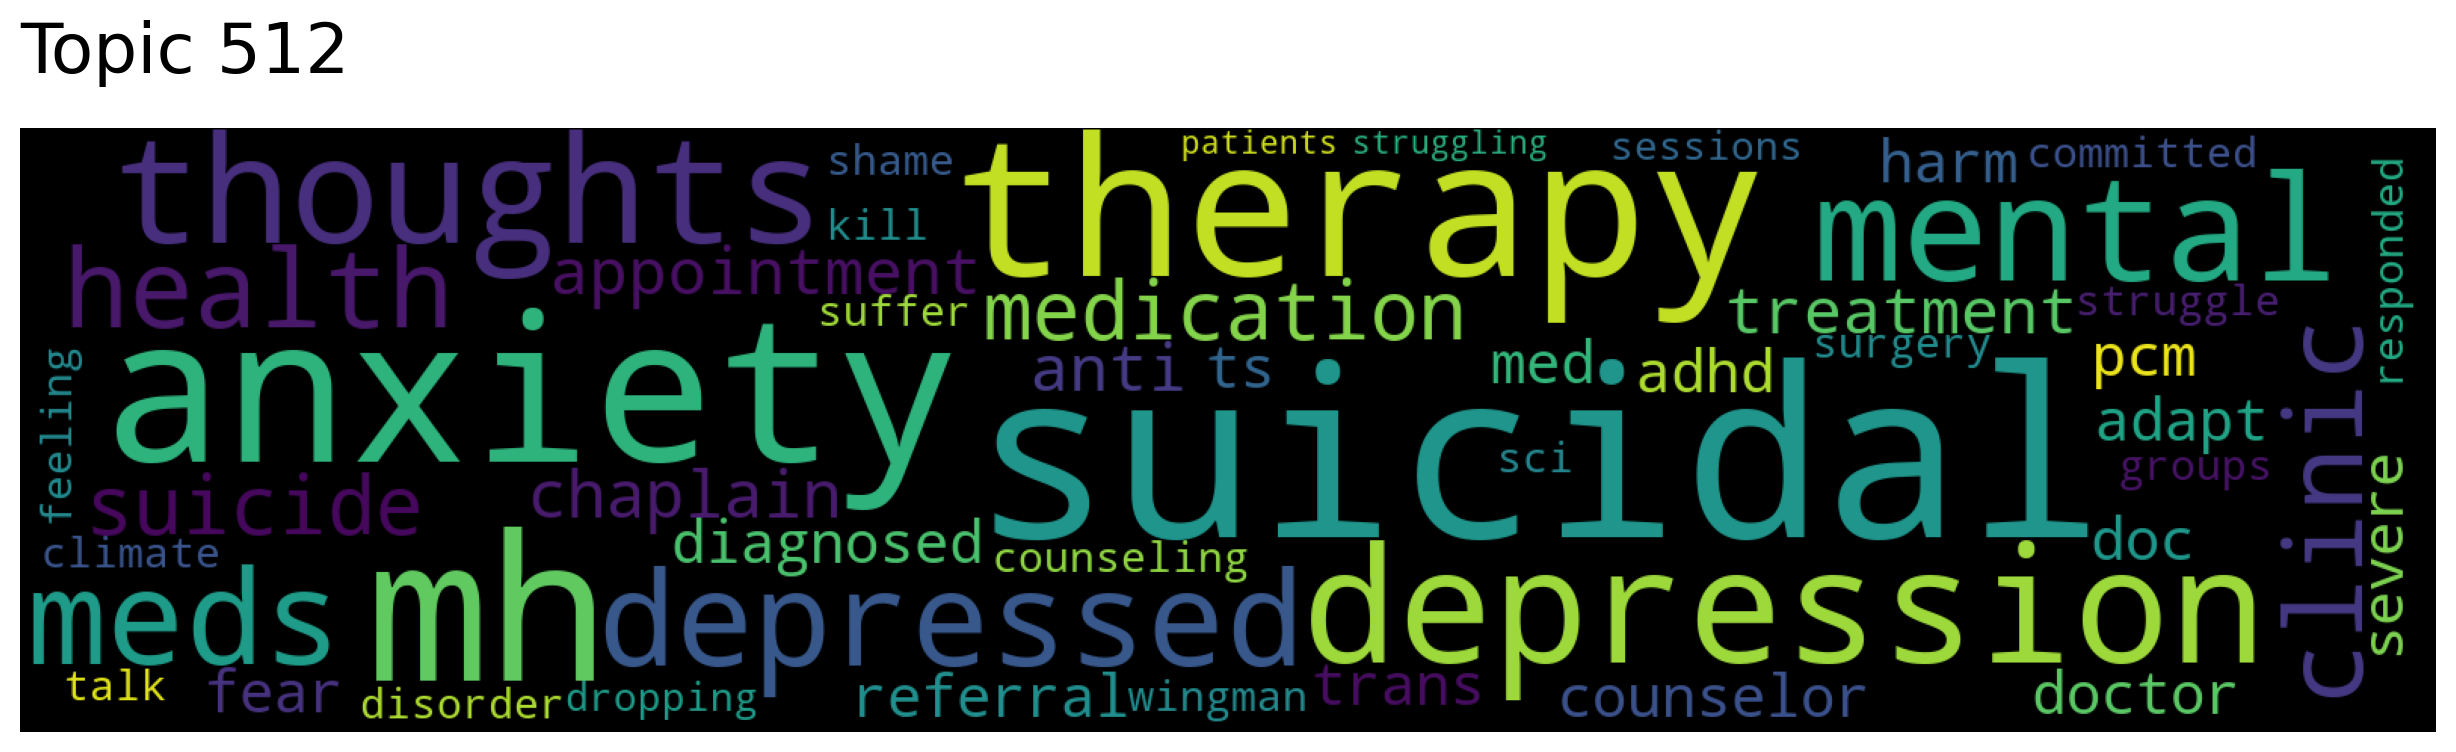

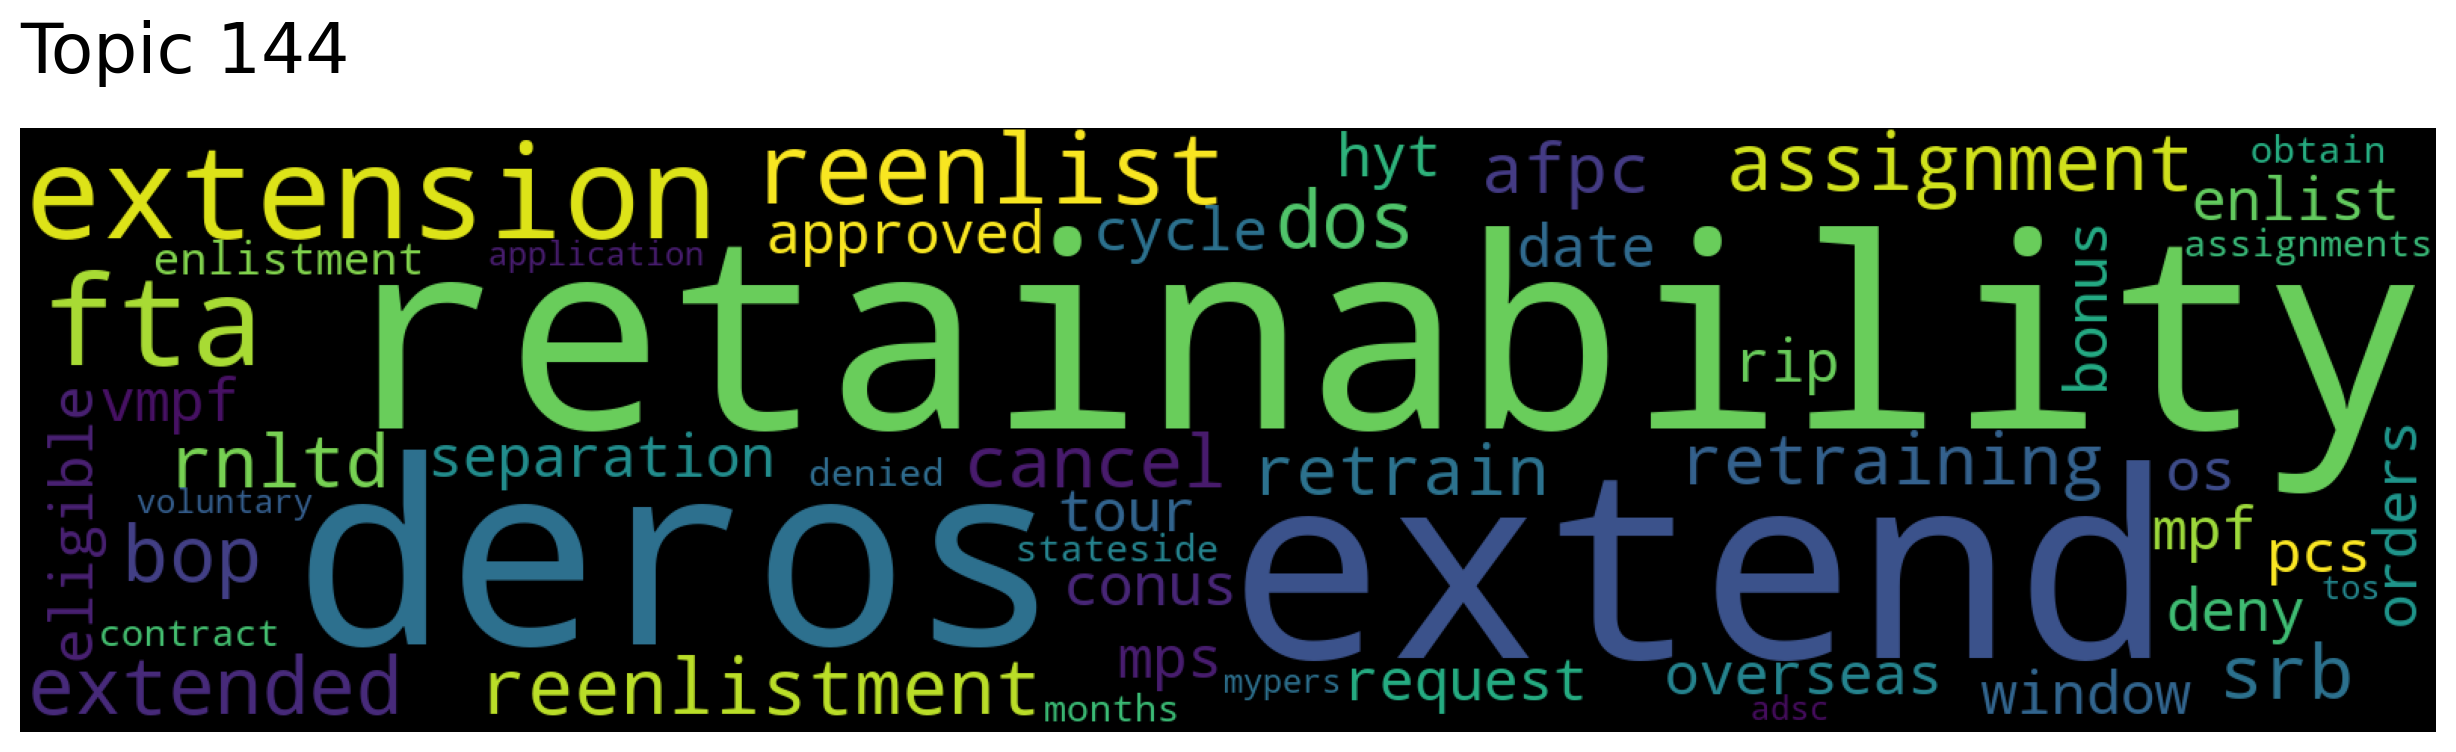

In [109]:

# Searching for topic clusters most similar to "depression".
d_topic_words, d_word_scores, d_topic_scores, d_topic_nums = model.search_topics(keywords=["depression"], num_topics=1)
print("The top 50 topic words in order of semantic similarity " 
      + "to the search keyword, 'depression': ")
print(d_topic_words)
print("The cosine similarity scores of the top 50 words " 
      + "for the search keyword, 'depression': ")
print(d_word_scores)
print("The cosine similarity of each topic to the search keyword," 
      + " 'depression': ")
print(d_topic_scores)
print("The unique index of every topicmost similar to 'depression': ")
print(d_topic_nums)
# Generate Word Clouds
print("Topic cluster most similar to 'depression': ")
print(d_topic_nums[0])
for topic in d_topic_nums:
    model.generate_topic_wordcloud(topic)

# Search for topics most similar to "PCS".
p_topic_words, p_word_scores, p_topic_scores, p_topic_nums = model.search_topics(keywords=["PCS"], num_topics=1)
print("The top 50 topic words in order of semantic similarity to the search keyword," 
      + " 'PCS': ")
print(p_topic_words)
print("The cosine similarity scores of the top 50 words for the search keyword," 
      + " 'PCS': ")
print(p_word_scores)
print("The cosine similarity of each topic to the search keyword," 
      + " 'PCS': ")
print(p_topic_scores)
print("The unique index of every topic most similar to 'PCS': ")
print(p_topic_nums)
# Generate Word Clouds
print("Topic cluster most similar to 'PCS': ")
print(p_topic_nums[0])
for topic in p_topic_nums:
    model.generate_topic_wordcloud(topic)



# **Counts of the permanent change of station and mental health topic related subreddit comments.**

In [111]:
# Dataframe for body of comments and UTC dates:
# Extracts comment body and UTC date columns from dataframe.
df_body_UTC = df 
print(type(df_body_UTC))
print(df_body_UTC.head()) # Displays top five dataframe rows.
# Converts UTC column to list.
UTC_dates = df['created_utc'].tolist()
# Array of UTC dates.
UTC_dates_ids = list(range(len(UTC_dates)))



<class 'pandas.core.frame.DataFrame'>
                                                      body   created_utc
167968   Being depressed feels an awful lot like being ...  1.414623e+09
420275                               Get a new memo stupid  1.627324e+09
277601   It will not matter that you have a birthday wh...  1.344848e+09
262872                      Glad I have your vote in 2016!  1.452923e+09
1012630  That is actually quite fascinating actually. I...  1.655010e+09


In [112]:
# Array of documents.
doc_ids = list(range(len(documents))) # ID of every document in the dataset.
# Topic cluster label (numerical) for every document in the dataset.
document_labels = model.get_documents_topics(doc_ids) 
document_labels[0] # Displays array.

array([512,  55,  52, ..., 157, 202, 826])

In [113]:
# Array of UTC dates.
date_UTC_ids = list(range(len(UTC_dates))) # ID of every UTC date in the dataset.
# Topic cluster label (numerical) for every UTC date in the dataset.
UTC_dates_labels = model.get_documents_topics(date_UTC_ids) 
UTC_dates_labels[0] # Displays array.

array([512,  55,  52, ..., 157, 202, 826])

# **ENUMERATE:**

Documents

In [114]:
# Depression + PCS 
import random
# Initializes list of topic cluster labels (PCS and depression) for each document.
depression_pcs_document_labels = [] 
# Initializes list of document comment bodies (PCS and depression).
depression_pcs_documents = []
# Keeps count of PCS and depression similar documents.
depression_PCS_count = 0 
depression_count = 0 
pcs_count = 0 

# Uses Enumerate() to count various items by looping through document indexes and cluster IDs.
for doc_index, cluster_id in enumerate(document_labels[0]):
  # To keep count of 'depression' + 'PCS' documents.
  add_document_to_depression_pcs_documents = False 

  if cluster_id == d_topic_nums[0]: # If cluster ID is a depression topic:
    depression_count += 1 # Increment count of depression documents by one.
    
    # Add depression label to depression label list.
    depression_pcs_document_labels.append('depression') 
    
    # Set depression document to add to depression + PCS list.
    add_document_to_depression_pcs_documents = True 
 
 
  elif cluster_id == p_topic_nums[0]: # If cluster ID is a PCS topic:
    pcs_count += 1 # Increment count of pcs documents by one.

    # Add depression label to PCS label list.
    depression_pcs_document_labels.append('pcs') 

    # Set PCS document to add to depression + PCS list.
    add_document_to_depression_pcs_documents = True
   

  # Add document to depression + PCS list.
  if add_document_to_depression_pcs_documents:
    depression_pcs_documents.append(documents[doc_index])

depression_PCS_count = depression_count + pcs_count
print("List of each comment document: ")
print(depression_pcs_documents)

print("Both 'depression' and 'PCS' List of each comment document label: ")
print(depression_pcs_document_labels)

print(f"depression category count: {depression_count}")
print(f"PCS category count: {pcs_count}")
print("'depression' + 'PCS' list for comment count: ")
print(depression_PCS_count)


List of each comment document: 
['Being depressed feels an awful lot like being alone a lot of the time.  I don\'t know if it will help or not, but I can tell you from my own experience, a *whole* lot of Airmen have stories really similar to this.  They make it through it.  You\'re going to make it through it, too.\n\nI worked intel my whole career (1N\'s), so I can\'t speak for the rest of the Air Force, but there\'s a whole lot of people who attempt suicide and retire with 20 or 30.  Happens all the time.  I had an old commander who used to tell us, "If you tell us what\'s going on, we can help you through *anything*.  If you don\'t tell us what\'s going on, we can\'t." This situation is definitely something they can help you through -- just don\'t close up, don\'t retreat from your support group, even when you want to (and you will).\n\nGood luck, brother.  We\'re all rooting for you.', "That's what I did when I retrained, but something it doesn't say is that you may also need addit

In [115]:
# Depression
# Initializes list of topic cluster labels (PCS and depression) for each document.
depression_document_labels = [] 
# Initializes list of document comment bodies (PCS and depression).
depression_documents = []
depression_count = 0 # Depression count.

# Uses Enumerate() to count various items by looping through document indexes and cluster IDs.
for doc_index, cluster_id in enumerate(document_labels[0]):
  # To keep count of 'depression' + 'PCS' documents.
  add_document_to_depression_documents = False 

  if cluster_id == d_topic_nums[0]: # If cluster ID is a depression topic:
    depression_count += 1 # Increment count of depression documents by one.
    
    # Add depression label to depression label list.
    depression_document_labels.append('depression') 
    
    # Set depression document to add to depression + PCS list.
    add_document_to_depression_documents = True 
 
   

  # Add document to depression + PCS list.
  if add_document_to_depression_documents:
    depression_documents.append(documents[doc_index])

depression_count = depression_count
print("List of each depression comment document: ")
print(depression_documents)

print(f"depression category count: {depression_count}")



List of each depression comment document: 
['Being depressed feels an awful lot like being alone a lot of the time.  I don\'t know if it will help or not, but I can tell you from my own experience, a *whole* lot of Airmen have stories really similar to this.  They make it through it.  You\'re going to make it through it, too.\n\nI worked intel my whole career (1N\'s), so I can\'t speak for the rest of the Air Force, but there\'s a whole lot of people who attempt suicide and retire with 20 or 30.  Happens all the time.  I had an old commander who used to tell us, "If you tell us what\'s going on, we can help you through *anything*.  If you don\'t tell us what\'s going on, we can\'t." This situation is definitely something they can help you through -- just don\'t close up, don\'t retreat from your support group, even when you want to (and you will).\n\nGood luck, brother.  We\'re all rooting for you.', 'OP said he’s at 5 now so', "Wow thanks for all the info this is great. I'm gonna get 

In [116]:
# PCS
import random
# Initializes list of topic cluster labels (PCS and depression) for each document.
pcs_document_labels = [] 
# Initializes list of document comment bodies (PCS and depression).
pcs_documents = []
pcs_count = 0 

# Uses Enumerate() to count various items by looping through document indexes and cluster IDs.
for doc_index, cluster_id in enumerate(document_labels[0]):
  # To keep count of 'depression' + 'PCS' documents.
  add_document_to_pcs_documents = False 
 
  if cluster_id == p_topic_nums[0]: # If cluster ID is a PCS topic:
    pcs_count += 1 # Increment count of pcs documents by one.

    # Add depression label to PCS label list.
    pcs_document_labels.append('pcs') 

    # Set PCS document to add to depression + PCS list.
    add_document_to_pcs_documents = True
   

  # Add document to depression + PCS list.
  if add_document_to_pcs_documents:
    pcs_documents.append(documents[doc_index])


print("List of each PCS comment document: ")
print(pcs_documents)



print(f"PCS category count: {pcs_count}")



List of each PCS comment document: 
["That's what I did when I retrained, but something it doesn't say is that you may also need additional retainability for the assignment that follows. I extended for 24 months to retrain, but had to extend for another 6 months for my assignment. Extending was probably the best decision I could have made because if you reenlist, you become a career airman, but if you just extend you maintain your status as a first term airman (FTA) and can still apply for the additional first term benefits like an early BOP. So if you don't like where you end up, you can apply for the FTA BOP after 12 months time on station as long as you have a career job reservation which is pretty much guaranteed as a FTA.\n\nThe extension is a contract too, so if the reasons for the extension no longer apply and you haven't entered into the extension you can cancel it. However, like mauicormac stated, if you've started the extension you can't cancel.", 'First, are you even qualifi

# Dates UTC

In [117]:
# Depression + PCS 
import random 
# Initializes list of topic cluster labels (PCS and depression) for each UTC_dates.
depression_pcs_UTC_dates_labels = [] 
# Initializes list of UTC_dates comment bodies (PCS and depression).
depression_pcs_UTC_dates = []
# Keeps count of PCS and depression similar UTC_dates.
depression_PCS_count = 0 
depression_count = 0 
pcs_count = 0 

# Uses Enumerate() to count various items by looping through UTC_dates indexes and cluster IDs.
for UTC_date_index, cluster_id in enumerate(UTC_dates_labels[0]):
  # To keep count of 'depression' + 'PCS' UTC_dates.
  add_UTC_date_to_depression_pcs_UTC_dates = False 

  if cluster_id == d_topic_nums[0]: # If cluster ID is a depression topic:
    depression_count += 1 # Increment count of depression UTC_dates by one.
    
    # Add depression label to depression label list.
    depression_pcs_UTC_dates_labels.append('depression') 
    
    # Set depression UTC_date to add to depression + PCS list.
    add_UTC_date_to_depression_pcs_UTC_dates = True 
 
 
  elif cluster_id == p_topic_nums[0]: # If cluster ID is a PCS topic:
    pcs_count += 1 # Increment count of pcs UTC_dates by one.

    # Add depression label to PCS label list.
    depression_pcs_UTC_dates_labels.append('pcs') 

    # Set PCS UTC_date to add to depression + PCS list.
    add_UTC_date_to_depression_pcs_UTC_dates = True
   

  # Add UTC_date to depression + PCS list.
  if add_UTC_date_to_depression_pcs_UTC_dates:
    depression_pcs_UTC_dates.append(UTC_dates[UTC_date_index])

depression_PCS_count = depression_count + pcs_count
print("List of each comment UTC_date: ")
print(depression_pcs_UTC_dates)

print("Both 'depression' and 'PCS' List of each comment UTC_date label: ")
print(depression_pcs_UTC_dates_labels)

print(f"depression category count: {depression_count}")
print(f"PCS category count: {pcs_count}")
print("'depression' + 'PCS' list for comment count: ")
print(depression_PCS_count)


List of each comment UTC_date: 
[1414622853.0, 1407340849.0, 1644845737.0, 1472822336.0, 1586232083.0, 1594853474.0, 1467301009.0, 1487189735.0, 1529171684.0, 1416172055.0, 1586716055.0, 1368928426.0, 1385182251.0, 1409156303.0, 1466084372.0, 1472839988.0, 1552050055.0, 1572373608.0, 1471086717.0, 1484169635.0, 1642264013.0, 1595369095.0, 1357670125.0, 1578545954.0, 1666999460.0, 1651086503.0, 1467906115.0, 1537678415.0, 1366603649.0, 1355878036.0, 1626552427.0, 1392478898.0, 1620008514.0, 1544522092.0, 1495811407.0, 1451211507.0, 1489498420.0, 1450482561.0, 1434499365.0, 1533024480.0, 1596717607.0, 1660608764.0, 1482931593.0, 1418780212.0, 1431312835.0, 1507959680.0, 1461873963.0, 1515180553.0, 1610311645.0, 1583249244.0, 1566870320.0, 1394326600.0, 1425253633.0, 1385619405.0, 1343204271.0, 1461616119.0, 1366913400.0, 1628730287.0, 1503631539.0, 1436727157.0, 1594249497.0, 1549837372.0, 1658098140.0, 1474543136.0, 1616977768.0, 1639198887.0, 1562027410.0, 1632354623.0, 1607648121.0, 1

In [118]:
# Depression 
# Initializes list of topic cluster labels (PCS and depression) for each UTC_date.
depression_UTC_date_labels = [] 
# Initializes list of UTC_date comment bodies (PCS and depression).
depression_UTC_dates = []
depression_count = 0 # Depression count.

# Uses Enumerate() to count various items by looping through UTC_date indexes and cluster IDs.
for UTC_date_index, cluster_id in enumerate(UTC_dates_labels[0]):
  # To keep count of 'depression' + 'PCS' UTC_dates.
  add_UTC_date_to_depression_UTC_dates = False 

  if cluster_id == d_topic_nums[0]: # If cluster ID is a depression topic:
    depression_count += 1 # Increment count of depression UTC_dates by one.
    
    # Add depression label to depression label list.
    depression_UTC_date_labels.append('depression') 
    
    # Set depression UTC_date to add to depression + PCS list.
    add_UTC_date_to_depression_UTC_dates = True 
 
   

  # Add UTC_date to depression + PCS list.
  if add_UTC_date_to_depression_UTC_dates:
    depression_UTC_dates.append(UTC_dates[UTC_date_index])

depression_count = depression_count
print("List of each depression comment UTC_date: ")
print(depression_UTC_dates)

print(f"depression category count: {depression_count}")


List of each depression comment UTC_date: 
[1414622853.0, 1644845737.0, 1586232083.0, 1529171684.0, 1472839988.0, 1552050055.0, 1572373608.0, 1642264013.0, 1595369095.0, 1357670125.0, 1666999460.0, 1434499365.0, 1660608764.0, 1482931593.0, 1418780212.0, 1515180553.0, 1394326600.0, 1549837372.0, 1474543136.0, 1639198887.0, 1632354623.0, 1454553131.0, 1552532062.0, 1498171093.0, 1586063866.0, 1604379811.0, 1426097295.0, 1469924304.0, 1579739882.0, 1599514408.0, 1455399566.0, 1566066181.0, 1600916113.0, 1543596574.0, 1634525077.0, 1668087352.0, 1576390785.0, 1417171688.0, 1648864913.0, 1477273222.0, 1429315811.0, 1541436414.0, 1648577893.0, 1493935820.0, 1627350248.0, 1394339643.0, 1447982581.0, 1526412423.0, 1635463553.0, 1424744473.0, 1592495665.0, 1396393461.0, 1510473626.0, 1477948037.0, 1539887385.0, 1496289962.0, 1453086679.0, 1532394971.0, 1430080994.0, 1500815296.0, 1573602346.0, 1661385074.0, 1524535649.0, 1657313196.0, 1508261669.0, 1644683266.0, 1635307027.0, 1454026116.0, 1443

In [119]:
# PCS
import random
# Initializes list of topic cluster labels (PCS and depression) for each UTC_date.
pcs_UTC_date_labels = [] 
# Initializes list of UTC_date comment bodies (PCS and depression).
pcs_UTC_dates = []
pcs_count = 0 

# Uses Enumerate() to count various items by looping through UTC_date indexes and cluster IDs.
for UTC_date_index, cluster_id in enumerate(UTC_dates_labels[0]):
  # To keep count of 'depression' + 'PCS' UTC_dates.
  add_UTC_date_to_pcs_UTC_dates = False 
 
  if cluster_id == p_topic_nums[0]: # If cluster ID is a PCS topic:
    pcs_count += 1 # Increment count of pcs UTC_dates by one.

    # Add depression label to PCS label list.
    pcs_UTC_date_labels.append('pcs') 

    # Set PCS UTC_date to add to depression + PCS list.
    add_UTC_date_to_pcs_UTC_dates = True
   

  # Add UTC_date to depression + PCS list.
  if add_UTC_date_to_pcs_UTC_dates:
    pcs_UTC_dates.append(UTC_dates[UTC_date_index])


print("List of each PCS comment UTC_date: ")
print(pcs_UTC_dates)



print(f"PCS category count: {pcs_count}")

List of each PCS comment UTC_date: 
[1407340849.0, 1472822336.0, 1594853474.0, 1467301009.0, 1487189735.0, 1416172055.0, 1586716055.0, 1368928426.0, 1385182251.0, 1409156303.0, 1466084372.0, 1471086717.0, 1484169635.0, 1578545954.0, 1651086503.0, 1467906115.0, 1537678415.0, 1366603649.0, 1355878036.0, 1626552427.0, 1392478898.0, 1620008514.0, 1544522092.0, 1495811407.0, 1451211507.0, 1489498420.0, 1450482561.0, 1533024480.0, 1596717607.0, 1431312835.0, 1507959680.0, 1461873963.0, 1610311645.0, 1583249244.0, 1566870320.0, 1425253633.0, 1385619405.0, 1343204271.0, 1461616119.0, 1366913400.0, 1628730287.0, 1503631539.0, 1436727157.0, 1594249497.0, 1658098140.0, 1616977768.0, 1562027410.0, 1607648121.0, 1395670581.0, 1609796471.0, 1443622860.0, 1665453375.0, 1450999294.0, 1504158545.0, 1526559252.0, 1652110109.0, 1424315644.0, 1503501416.0, 1507006793.0, 1649815888.0, 1607571967.0, 1515277380.0, 1471461561.0, 1606134370.0, 1439097095.0, 1526803903.0, 1476264434.0, 1621995972.0, 1517233836.

# Categorical Dataframe

In [120]:
# Depression or PCS
df_depression_pcs = pd.DataFrame({'Documents_from_Depression_or_PCS_Topics': depression_pcs_documents,
                                  'UTC_dates_from_Depression_or_PCS_Topics': depression_pcs_UTC_dates, 
                                  'Topic': depression_pcs_document_labels})
df_depression_pcs


,Documents_from_Depression_or_PCS_Topics,UTC_dates_from_Depression_or_PCS_Topics,Topic
0,Being depressed feels an awful lot like being ...,1.414623e+09,depression
1,"That's what I did when I retrained, but someth...",1.407341e+09,pcs
2,OP said he’s at 5 now so,1.644846e+09,depression
3,"First, are you even qualified as in rank, and ...",1.472822e+09,pcs
4,Wow thanks for all the info this is great. I'm...,1.586232e+09,depression
...,...,...,...
260,"Please, no tie tabs!",1.632295e+09,pcs
261,Sorry for being off topic but did you want a s...,1.434379e+09,pcs
262,Thanks man,1.445926e+09,depression
263,"That's mids brain for you, OP tried their best",1.636722e+09,pcs


In [124]:
df_depression_pcs.to_csv('depression_pcs_data_DAF.csv')

In [125]:
from google.colab import files
files.download('depression_pcs_data_DAF.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>